In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers as tfl
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image

In [2]:
testp = os.listdir('../input/fingers/test/') 
trainp = os.listdir('../input/fingers/train/')

In [3]:
trainp

['7194c4e9-8e19-496a-9c56-56678d40b67b_4R.png',
 '6c9cec85-6a2f-4c6c-bf85-5036f0f441c4_4L.png',
 '12852b4c-bb12-4d1e-8cba-b7e35fb5b266_0R.png',
 '6dec2dfe-79ce-4e3e-bc36-18a0d5910cd8_4L.png',
 'bbbe289b-d76f-4157-a9c7-65dc24f4e5df_1L.png',
 '681b1b43-3211-4a1a-8f3c-25c61fec417f_4L.png',
 'cba750d1-1ae8-4bc6-80f9-1dfa6510ce3e_2L.png',
 '37bf16f9-1c77-4d4a-9a15-e70dc896a61e_5R.png',
 '45144858-c3b9-454e-b67b-8fc7d3ca1ebd_0R.png',
 '6a726018-c498-4d04-9ba7-08e8dfebb6d0_3L.png',
 '1aa3b66a-ecd2-4187-8b5d-ae20e135e25e_4R.png',
 'e0a81032-b8fb-473a-8e8d-4a7e0d33bfa6_0R.png',
 'd1827637-aa4f-4887-a968-9167c4928991_3R.png',
 '84736368-27ac-4c5c-be86-ce0a3fbfa5cf_4R.png',
 'e3313914-8a43-4527-b09c-b401cb4a492e_4R.png',
 '13e330fe-dadb-438b-9478-3af8025d6682_4R.png',
 '71b42729-5993-4cc3-b5f0-1970984283a4_5R.png',
 '7c0c6ee9-a807-4235-b3d8-451ba5d5e59b_4L.png',
 'af49cc28-ea5b-4134-bd26-9df5857a9ebd_5R.png',
 'd6c28795-e09f-4e35-a2cc-86f8e14b8d19_3R.png',
 '4e35a58b-0a54-4a66-95ff-6dbff6bd3716_4

In [4]:

path = []
labels = []

for i in trainp:
    labels.append(i.split('.')[0][-2:])
    print(i)
    path.append('../input/fingers/train/'+i)
return path, labels
       


7194c4e9-8e19-496a-9c56-56678d40b67b_4R.png
6c9cec85-6a2f-4c6c-bf85-5036f0f441c4_4L.png
12852b4c-bb12-4d1e-8cba-b7e35fb5b266_0R.png
6dec2dfe-79ce-4e3e-bc36-18a0d5910cd8_4L.png
bbbe289b-d76f-4157-a9c7-65dc24f4e5df_1L.png
681b1b43-3211-4a1a-8f3c-25c61fec417f_4L.png
cba750d1-1ae8-4bc6-80f9-1dfa6510ce3e_2L.png
37bf16f9-1c77-4d4a-9a15-e70dc896a61e_5R.png
45144858-c3b9-454e-b67b-8fc7d3ca1ebd_0R.png
6a726018-c498-4d04-9ba7-08e8dfebb6d0_3L.png
1aa3b66a-ecd2-4187-8b5d-ae20e135e25e_4R.png
e0a81032-b8fb-473a-8e8d-4a7e0d33bfa6_0R.png
d1827637-aa4f-4887-a968-9167c4928991_3R.png
84736368-27ac-4c5c-be86-ce0a3fbfa5cf_4R.png
e3313914-8a43-4527-b09c-b401cb4a492e_4R.png
13e330fe-dadb-438b-9478-3af8025d6682_4R.png
71b42729-5993-4cc3-b5f0-1970984283a4_5R.png
7c0c6ee9-a807-4235-b3d8-451ba5d5e59b_4L.png
af49cc28-ea5b-4134-bd26-9df5857a9ebd_5R.png
d6c28795-e09f-4e35-a2cc-86f8e14b8d19_3R.png
4e35a58b-0a54-4a66-95ff-6dbff6bd3716_4R.png
4acb320b-644c-40b6-9e81-c9967d2a37f4_5L.png
7afcf02a-c3a1-4b09-b20c-85b0a73f

SyntaxError: 'return' outside function (3949963788.py, line 8)

In [5]:
tpath = []
tlabels = []

for a in testp:
    tlabels.append(a.split('.')[0][-2:])
    print(a)
    tpath.append('../input/fingers/test/'+a)
return tpath, tlabels

ef512789-23fb-4da6-ad2e-38780d9cd914_1L.png
5c2887a4-66d5-4a8b-bfd1-480af73b99de_0R.png
c65d6d63-b067-4a76-b745-8a4b97c133e5_0R.png
47727ea2-874b-482b-9f6d-d5203dc06e30_3L.png
df3e395d-3100-4c90-9473-cd60ab00b16c_4R.png
f6015e1d-f08d-47ed-8958-159baf40a8f1_1L.png
92c2ce4b-1fbe-44fa-84e2-4a7575d5981a_4R.png
0dfdb247-06aa-4814-b445-89af79377e35_3L.png
6aa40777-cc2a-4c5a-a620-a70ee0d2195e_1L.png
ae26e9e2-3686-4254-8600-1068ce3f7a63_4R.png
9a3b9c78-63b3-45f7-b61c-99cbb683e5de_4R.png
16b17cf5-af0e-4743-a55f-c056ede7cc3c_4R.png
a21444c0-d4a8-4739-9ed6-e01d1264fb58_1L.png
857d233a-70f0-492b-b553-bcfc1972b5d0_1R.png
6b27e501-dc8f-4543-b046-57e483f6cbfc_1R.png
f159068a-46d6-4564-b68f-bb9dade8c496_5L.png
837cc34c-7d5e-4c3f-9c85-48505f107766_3L.png
f0d143ec-1818-4c78-82ec-22b44059b4a4_5R.png
4a4f8952-88a8-4c22-8512-5dbcf709dddc_5L.png
bd4add77-f502-4f98-b805-9edce2bf9cf4_2R.png
6fdf8463-0e6b-447d-badf-10a46a5b91ae_4L.png
3f0ea41c-de9d-481f-a00c-c1be0f40ed24_2L.png
e0d90cc0-af9c-421a-b974-59fbe892

SyntaxError: 'return' outside function (2021098502.py, line 8)

In [6]:
len(path),len(labels),len(tpath),len(tlabels)

(18000, 18000, 3600, 3600)

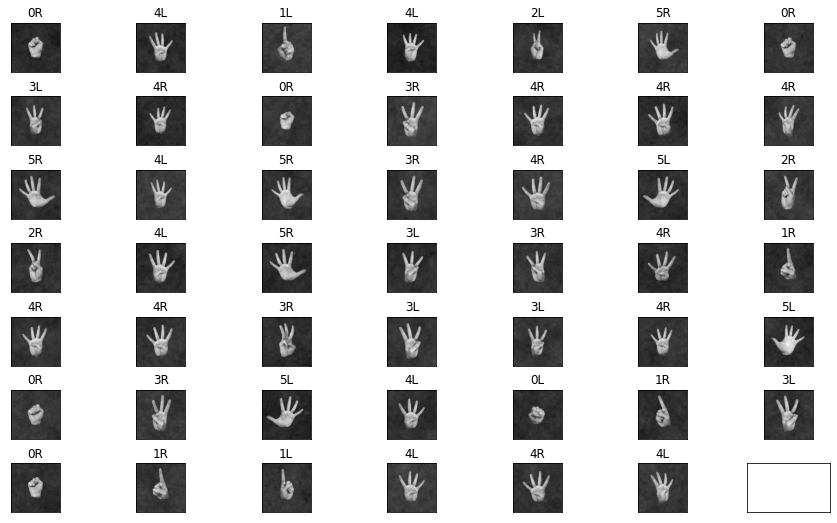

In [7]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    image = cv2.imread(path[n])
    plt.imshow(image)
    plt.title(labels[n])   
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)   
    plt.xticks([]) , plt.yticks([])    
plt.show()

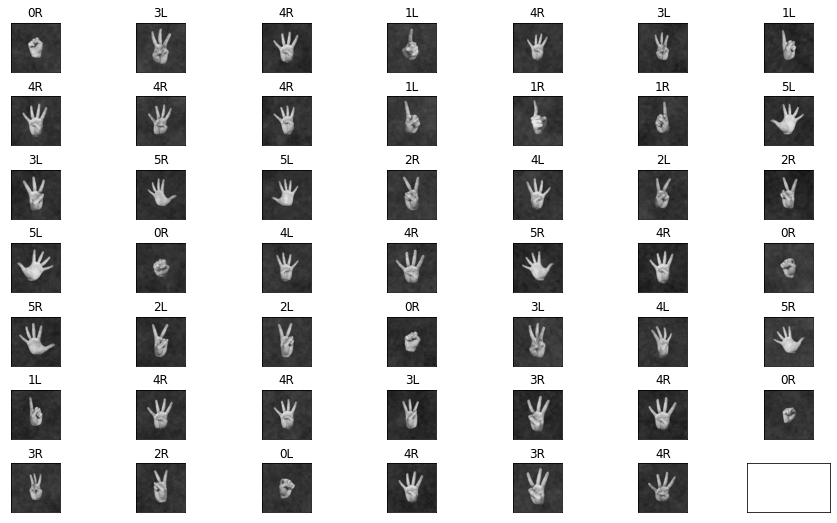

In [8]:
plt.figure(1 , figsize = (15 , 9))
u = 0 
for i in range(49):
    u += 1 
    image = cv2.imread(tpath[u])
    plt.imshow(image)
    plt.title(tlabels[u])   
    plt.subplot(7 , 7 , u)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)   
    plt.xticks([]) , plt.yticks([])    
plt.show()

In [9]:
data = []
for i in path:
    image=cv2.imread(i)
    data.append(image)


In [10]:
tdata = []
for a in tpath:
    image=cv2.imread(a)
    tdata.append(image)

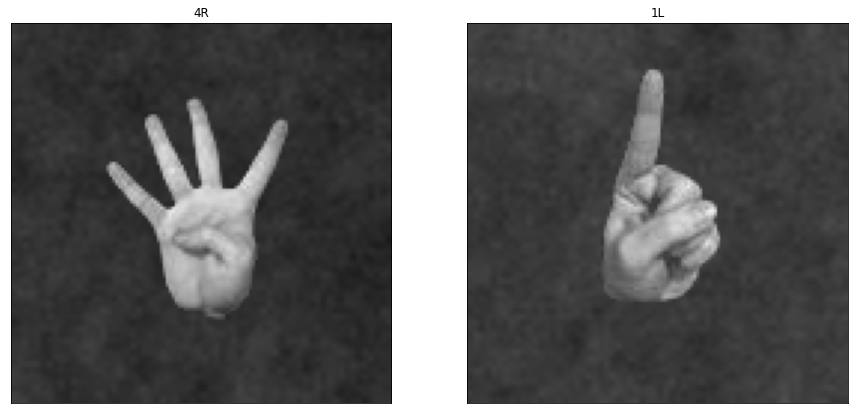

In [11]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(data[0])
plt.title(labels[0])
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(tdata[0])
plt.title(tlabels[0])
plt.xticks([]) , plt.yticks([])

plt.show()

In [12]:
len(np.unique(tlabels))


12

In [13]:
num_class=len(np.unique(labels))
num_class

12

In [21]:
trdata = np.array(data)
ttdata = np.array(tdata)

In [22]:
trdata.shape,ttdata.shape

((18000, 128, 128, 3), (3600, 128, 128, 3))

In [15]:
label_encoder = preprocessing.LabelEncoder()
trlabels = label_encoder.fit_transform(labels)
ttlabels = label_encoder.fit_transform(tlabels)

In [16]:
len(np.unique(trlabels))

12

In [17]:
trlabels = keras.utils.to_categorical(trlabels, num_class)
ttlabels = keras.utils.to_categorical(ttlabels, num_class)

print(trlabels.shape)
print(ttlabels.shape)

(18000, 12)
(3600, 12)


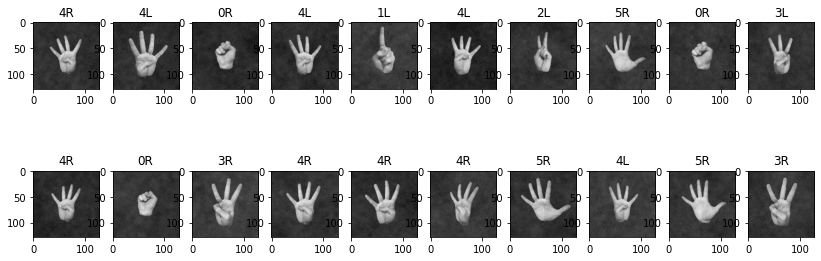

In [23]:
plt.figure(figsize=(14,5))
x, y = 10, 2 
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(trdata[i], cmap='gray')
    plt.title(labels[i])
plt.show()

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization

In [20]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class,activation='softmax'))




2023-01-14 18:59:54.010754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 18:59:54.112206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 18:59:54.113076: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 18:59:54.115087: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [27]:
from sklearn.model_selection import train_test_split

x_train , x_val , y_train , y_val = train_test_split(trdata , trlabels , 
                                            test_size = 0.2 ,
                                            random_state = 111)


In [25]:
x_train=x_train.astype("float32") / 255
x_val=x_val.astype("float32") / 255

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

AttributeError: 'list' object has no attribute 'astype'

In [28]:
batch_size = 138
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_val, y_val))

2023-01-14 19:02:24.176795: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2023-01-14 19:02:25.801599: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


105/105 [==============================] - 11s 30ms/step - loss: 6.2067 - accuracy: 0.0859 - val_loss: 2.3312 - val_accuracy: 0.1347
Epoch 2/15
105/105 [==============================] - 2s 23ms/step - loss: 2.4029 - accuracy: 0.1185 - val_loss: 2.2765 - val_accuracy: 0.1603
Epoch 3/15
105/105 [==============================] - 2s 23ms/step - loss: 2.3750 - accuracy: 0.1249 - val_loss: 2.2635 - val_accuracy: 0.1617
Epoch 4/15
105/105 [==============================] - 3s 27ms/step - loss: 2.3767 - accuracy: 0.1203 - val_loss: 2.2573 - val_accuracy: 0.1617
Epoch 5/15
105/105 [==============================] - 2s 23ms/step - loss: 2.3767 - accuracy: 0.1239 - val_loss: 2.2537 - val_accuracy: 0.1617
Epoch 6/15
105/105 [==============================] - 2s 24ms/step - loss: 2.3724 - accuracy: 0.1263 - val_loss: 2.2509 - val_accuracy: 0.1617
Epoch 7/15
105/105 [==============================] - 2s 23ms/step - loss: 2.3765 - accuracy: 0.1245 - val_loss: 2.2495 - val_accuracy: 0.1608
Epoch 8/1

In [31]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    conv_layer1 = tfl.Conv2D(filters= 8 , kernel_size= 4 , strides= 1 , padding='same')(input_img)
    activation1 = tfl.ReLU()(conv_layer1)
    pool_layer1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='same')(activation1)
    conv_layer2 = tfl.Conv2D(filters= 16 , kernel_size= 2 , strides= 1 , padding='same')(pool_layer1)
    activation2 = tfl.ReLU()(conv_layer2)
    pool_layer2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(activation2)
    flatten =  tfl.Flatten()(pool_layer2)
    outputs =  tfl.Dense(units=num_class, activation='softmax')(flatten)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [32]:
conv_model = convolutional_model((128, 128, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 8)       392       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        528       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0     

In [33]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(128)

history = conv_model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
113/113 [==============================] - 3s 19ms/step - loss: 20.9352 - accuracy: 0.3306 - val_loss: 1.8146 - val_accuracy: 0.6078
Epoch 2/5
113/113 [==============================] - 2s 15ms/step - loss: 1.2020 - accuracy: 0.7219 - val_loss: 0.6897 - val_accuracy: 0.8261
Epoch 3/5
113/113 [==============================] - 2s 17ms/step - loss: 0.5294 - accuracy: 0.8593 - val_loss: 0.3657 - val_accuracy: 0.8939
Epoch 4/5
113/113 [==============================] - 2s 15ms/step - loss: 0.2856 - accuracy: 0.9137 - val_loss: 0.2098 - val_accuracy: 0.9311
Epoch 5/5
113/113 [==============================] - 2s 15ms/step - loss: 0.1661 - accuracy: 0.9472 - val_loss: 0.1334 - val_accuracy: 0.9589


In [34]:
model = Sequential()
model.add(Conv2D(120,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Conv2D(260,(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3))
model.add(Dropout(0.3))

model.add(Conv2D(364,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(4064,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4064,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
batch_size = 138
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_val, y_val))

Epoch 1/15
105/105 [==============================] - 21s 169ms/step - loss: 3.1346 - accuracy: 0.7837 - val_loss: 0.2233 - val_accuracy: 0.9231
Epoch 2/15
105/105 [==============================] - 16s 154ms/step - loss: 0.1435 - accuracy: 0.9539 - val_loss: 0.0646 - val_accuracy: 0.9781
Epoch 3/15
105/105 [==============================] - 16s 155ms/step - loss: 0.1151 - accuracy: 0.9697 - val_loss: 0.0198 - val_accuracy: 0.9942
Epoch 4/15
105/105 [==============================] - 16s 154ms/step - loss: 0.1219 - accuracy: 0.9755 - val_loss: 0.0359 - val_accuracy: 0.9897
Epoch 5/15
105/105 [==============================] - 16s 155ms/step - loss: 0.2483 - accuracy: 0.9667 - val_loss: 0.0720 - val_accuracy: 0.9814
Epoch 6/15
105/105 [==============================] - 16s 154ms/step - loss: 0.1542 - accuracy: 0.9790 - val_loss: 0.0187 - val_accuracy: 0.9964
Epoch 7/15
105/105 [==============================] - 16s 155ms/step - loss: 0.1526 - accuracy: 0.9810 - val_loss: 0.0340 - val_ac

In [36]:
score = model.evaluate(x_val, y_val, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.009548293426632881
Test accuracy: 0.9988889098167419


In [37]:
predictions = model.predict(ttdata)

In [38]:
list(predictions)

[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        3.981964e-37, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [39]:
len(predictions)

3600

In [41]:
class_names = list(np.unique(labels))
class_names

['0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L', '5R']

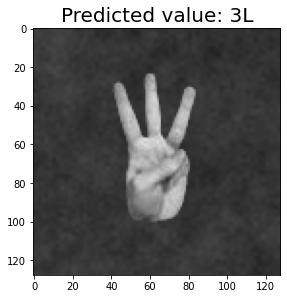

In [43]:

plt.figure(figsize=[10,10])

class_names = list(np.unique(labels))

plt.subplot(2,2,1) 
n = 543
plt.imshow(ttdata[n].reshape(128, 128, -1), cmap=plt.cm.binary) 
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

['0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L', '5R']


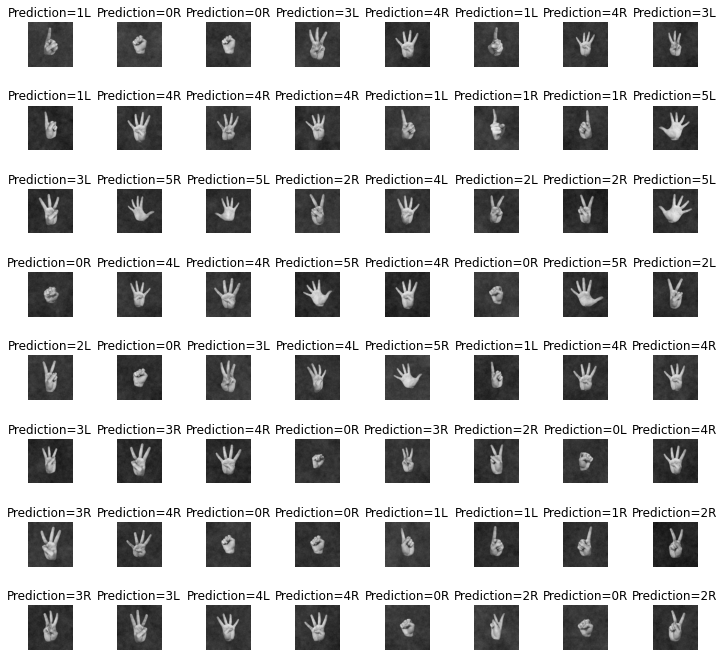

In [49]:
L=8
W=8
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(ttdata[i])
    axes[i].set_title('Prediction={}'.format(tlabels[i]))
    #axes[i].set_title('Prediction= {}\nTrue={}'.format(predictions[i].argmax(),tlabels[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
print(class_names)